In [22]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation

from keras import optimizers

print(tf.__version__)

1.11.0


In [23]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [24]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [25]:
train_labels=train_labels.reshape(50000,)
test_labels=test_labels.reshape(10000,)

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [26]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [27]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst
X_train = train_images
X_test = test_images
X_train_gray = grayscale(train_images)
X_test_gray = grayscale(test_images)
print(X_train_gray.shape)
print(X_test_gray.shape)

(50000, 32, 32, 1)
(10000, 32, 32, 1)


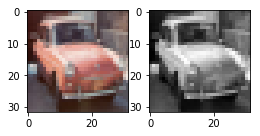

In [28]:
img_channels = 1

# plot a randomly chosen image
img = 64
plt.figure(figsize=(4, 2))
plt.subplot(1, 2, 1)
plt.imshow(X_train[img], interpolation='none')
plt.subplot(1, 2, 2)
plt.imshow(X_train_gray[img, :, :, 0], cmap=plt.get_cmap('gray'), interpolation='none')
plt.show()

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 1)),
    keras.layers.Dense(256, activation=tf.nn.relu), #can alter this 128 layers
    keras.layers.Dense(128, activation=tf.nn.relu), #can alter this 128 layers
    keras.layers.Dense(64, activation=tf.nn.relu),
   # keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [30]:
model.compile(keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train on 33500 samples, validate on 16500 samples
Epoch 1/30
33500/33500 [==============================] - 3s 103us/step - loss: 2.0759 - acc: 0.2389 - val_loss: 1.9759 - val_acc: 0.2866
Epoch 2/30
33500/33500 [==============================] - 3s 84us/step - loss: 1.9496 - acc: 0.2979 - val_loss: 1.9296 - val_acc: 0.2987
Epoch 3/30
33500/33500 [==============================] - 3s 83us/step - loss: 1.8917 - acc: 0.3230 - val_loss: 1.8875 - val_acc: 0.3233
Epoch 4/30
33500/33500 [==============================] - 3s 84us/step - loss: 1.8573 - acc: 0.3327 - val_loss: 1.8478 - val_acc: 0.3350
Epoch 5/30
33500/33500 [==============================] - 3s 84us/step - loss: 1.8184 - acc: 0.3467 - val_loss: 1.8505 - val_acc: 0.3424
Epoch 6/30
33500/33500 [==============================] - 3s 95us/step - loss: 1.7907 - acc: 0.3559 - val_loss: 1.8322 - val_acc: 0.3472
Epoch 7/30
33500/33500 [==============================] - 3s 92us/step - loss: 1.7717 - acc: 0.3642 - val_loss: 1.7843 - val_ac

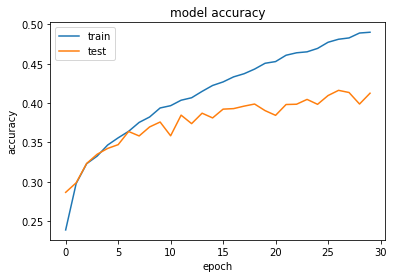

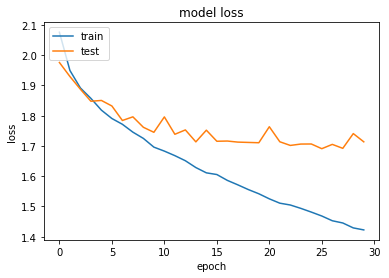

In [31]:
history = model.fit(X_train_gray, train_labels, validation_split=0.33, epochs=30)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model1_acc.png', bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('model1_loss.png', bbox_inches='tight')
plt.show()

In [32]:
test_loss, test_acc = model.evaluate(X_test_gray, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 28us/step
Test accuracy: 0.4219


In [34]:
predictions = model.predict(X_test_gray)

In [35]:
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[0.0390183  0.0029961  0.30017316 0.08565284 0.28089273 0.06857301
 0.1205992  0.03095916 0.06573956 0.00539592]
2
3


In [36]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

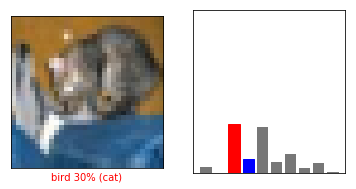

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

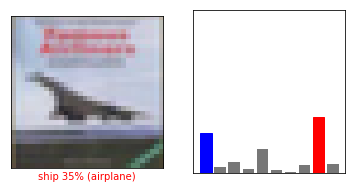

In [38]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

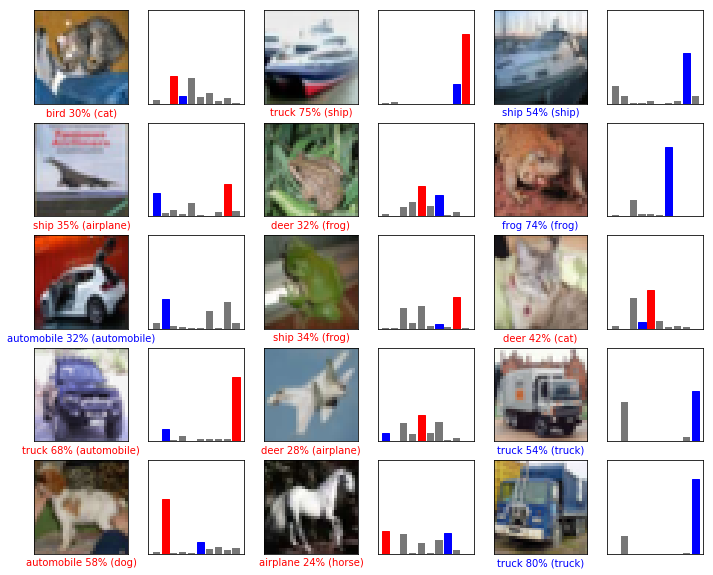

In [39]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.savefig('model_values.png', bbox_inches='tight')

In [1]:
#Grab an image from the test dataset
img = test_images[0]

print(img.shape)
img = (np.expand_dims(img,0))

print(img.shape)
predictions_single = model.predict(img)

print(predictions_single)

In [2]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.savefig('imagestats.png', bbox_inches='tight')

In [42]:
import mlflow.keras
mlflow.keras.save_model(model, 'model2')